### Cutting down the TRILEGAL/Kepler sample to match the Shibayama sample of G dwarfs.

In [ ]:
#Necessary modules 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import csv

#Paths 
data_path = '/Users/jessicaschonhut/flares_paper/'
trilegal_path = '/Users/jessicaschonhut/flares_paper/trilegal_data/'
shibayama_path = '/Users/jessicaschonhut/flares_paper/shibayama_data/'

#Checking the current sample
data = pd.read_csv(data_path + 'final_sample.csv')
teff = pd.read_csv(data_path + 'final_sample.csv')['logTe']
teff_down = 10**teff
logg = pd.read_csv(data_path + 'final_sample.csv')['logg']
kep_mag = pd.read_csv(data_path + 'final_sample.csv')['Kepler']
print('Number of stars in the final TRILEGAL/Mathur sample: ' + str(len(kep_mag)))

#Cutting sample down to G stars
g_stars = data[(data['logTe'] >= 3.7075701760979363) & (data['logTe'] <= 3.7781512503836434) & (data['logg'] >= 4)]   
print('Number of G stars in the final TRILEGAL/Mathur sample: ' + str(len(g_stars['logTe'])))
print('Number of stars in the Shibayama sample: 80000')
np.savetxt(data_path + 'g_stars.csv', g_stars, delimiter=',', header='index,Gc,logAge,[M/H],m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,Ks,Mact')

### Comparing the Shibayama sample of G stars to the sample created to replicate it.

In [17]:
teff_g = pd.read_csv(data_path + 'g_stars.csv')['logTe']
logg_g = pd.read_csv(data_path + 'g_stars.csv')['logg']

In [18]:
teff_shib = pd.read_csv(shibayama_path + 'shibayama_data_edited.txt', delimiter='|')['Teff']
logg_shib = pd.read_csv(shibayama_path + 'shibayama_data_edited.txt', delimiter='|')['log(g)']

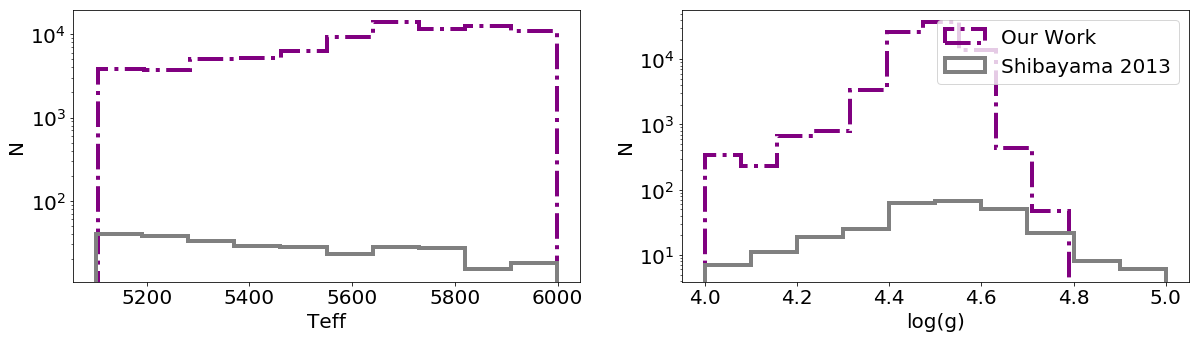

In [32]:
plt.figure(figsize=(20, 5))
plt.subplot(121)
plt.hist(10**teff_g, histtype='step', linewidth=4, linestyle='-.', color='purple')
plt.hist(teff_shib, histtype='step', linewidth=4, color='gray')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.yscale('log')
plt.ylabel('N', fontsize=20)
plt.xlabel('Teff', fontsize=20)

plt.subplot(122)
plt.hist(logg_g, histtype='step', label='Our Work', linewidth=4, linestyle='-.', color='purple')
plt.hist(logg_shib, histtype='step', label='Shibayama 2013', linewidth=4, color='gray')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('N', fontsize=20)
plt.xlabel('log(g)', fontsize=20)
plt.yscale('log')
plt.legend(fontsize=20)

plt.savefig('/Users/jessicaschonhut/flares_paper/shib_comparison_teff_logg.png')
plt.show()

### Checking that the Shibayama G dwarfs all fall uniformly in the Kepler FOV.

In [20]:
ra = pd.read_csv('/Users/jessicaschonhut/schonhut_stasik_2018/Supplement_20090714_00/morc_2_ra_dec_4_seasons_edit.txt')['RA_spring']
print(len(ra))
dec = pd.read_csv('/Users/jessicaschonhut/schonhut_stasik_2018/Supplement_20090714_00/morc_2_ra_dec_4_seasons_edit.txt')['DEC_spring']

420


In [21]:
ra_shib = pd.read_csv('/Users/jessicaschonhut/flares_paper/shibayama_data/shibayama_data_edited.txt', delimiter='|')['_RA']
dec_shib = pd.read_csv('/Users/jessicaschonhut/flares_paper/shibayama_data/shibayama_data_edited.txt', delimiter='|')['_DE']

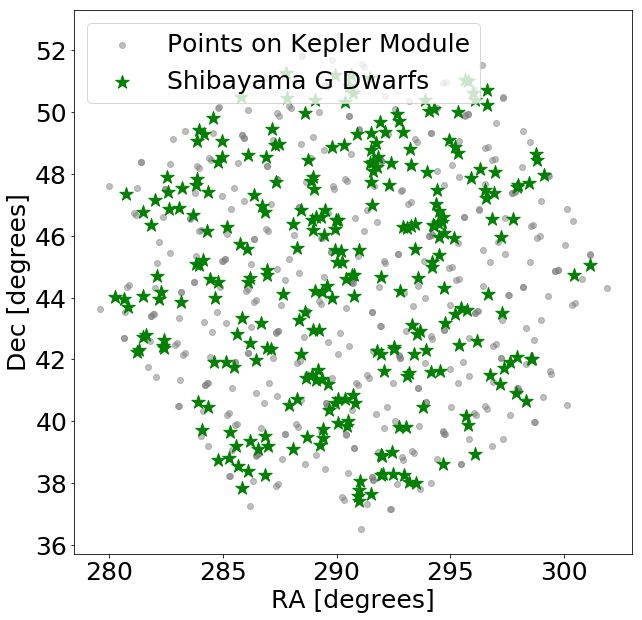

In [22]:
plt.figure(figsize=(10, 10))
plt.scatter(ra, dec, color='grey', alpha=0.5, label='Points on Kepler Module')
plt.scatter(ra_shib, dec_shib, marker='*', s=200, color='Green', label='Shibayama G Dwarfs')
plt.ylabel('Dec [degrees]', fontsize=25)
plt.xlabel('RA [degrees]', fontsize=25)
plt.xticks(fontsize=25)
plt.legend(fontsize=25)
plt.yticks(fontsize=25)
plt.savefig('/Users/jessicaschonhut/flares_paper/shib_stars_on_fov.png')
plt.show()